## Problem2

The dataset consists of quarterly sales data of Coca-Cola from 1986 to 1996. Predict sales for the next two years by using time series forecasting and prepare a document for each model explaining how many dummy variables you have created and also include the RMSE value for each model.

In [1]:
import pandas as pd
sales = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
sales.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [2]:
sales.dtypes

Quarter     object
Sales      float64
dtype: object

In [3]:
sales.shape

(42, 2)

In [8]:
np.arange(1,43)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [9]:
# Pre processing
import numpy as np

sales["t"] = np.arange(1,43)

sales["t_square"] = sales["t"] * sales["t"]
sales["log_sales"] = np.log(sales["Sales"])
sales.columns

Index(['Quarter', 'Sales', 't', 't_square', 'log_sales'], dtype='object')

In [10]:
sales['Quarter'][0]

'Q1_86'

In [13]:
p = sales['Quarter'][0]
p[0:2]

'Q1'

In [14]:
sales['quarters']= 0


for i in range(42):
    p = sales['Quarter'][i]
    sales['quarters'][i]= p[0:2]

   
quart_dummies = pd.DataFrame(pd.get_dummies(sales['quarters']))
sales1 = pd.concat([sales, quart_dummies], axis = 1)

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_13384/892941272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales['quarters'][i]= p[0:2]
c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
sales1.head()

,Quarter,Sales,t,t_square,log_sales,quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,1,0,0,0


<AxesSubplot:>

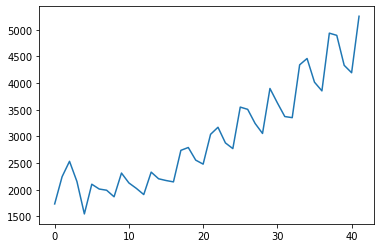

In [17]:
# Visualization - Time plot
sales1.Sales.plot()



In [18]:
sales1.shape


(42, 10)

In [19]:
sales1.head()

,Quarter,Sales,t,t_square,log_sales,quarters,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,1,1,7.458663,Q1,1,0,0,0
1,Q2_86,2244.960999,2,4,7.716443,Q2,0,1,0,0
2,Q3_86,2533.804993,3,9,7.837477,Q3,0,0,1,0
3,Q4_86,2154.962997,4,16,7.675529,Q4,0,0,0,1
4,Q1_87,1547.818996,5,25,7.344602,Q1,1,0,0,0


In [21]:
# Data Partition
Train = sales1.head(38)
Test = sales1.tail(4)



In [23]:
# to change the index value in pandas data frame 
# Test.set_index(np.arange(1,13))

####################### L I N E A R ##########################
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales ~ t', data = Train).fit()

linear_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     155.2
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.29e-14
Time:                        12:01:35   Log-Likelihood:                -277.54
No. Observations:                  38   AIC:                             559.1
Df Residuals:                      36   BIC:                             562.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1490.7358    122.247     12.194      0.000    1242.806    1738.665
t             68.0700      5.464     12.457      0.000      56.988      79.152
==============================================================================
Omnibus:                        3.568   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                3.210
Skew:                           0.700   Prob(JB):                        0.201
Kurtosis:                       2.740   Cond. No.                         45.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_linear))**2))
rmse_linear

591.553295722396

In [25]:
##################### Exponential ##############################

Exp = smf.ols('log_sales ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp



466.2479731067161

In [26]:
#################### Quadratic ###############################

Quad = smf.ols('Sales ~ t + t_square', data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_Quad))**2))
rmse_Quad



475.5618351831504

In [29]:
################### Additive seasonality ########################

add_sea = smf.ols('Sales ~ Q1 + Q2+ Q3 + Q4', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1' ,'Q2', 'Q3' , 'Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea



1860.0238154547274

In [30]:
################## Multiplicative Seasonality ##################

Mul_sea = smf.ols('log_sales ~ Q1 + Q2+ Q3 + Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea



1963.3896400779681

In [31]:
################## Additive Seasonality Quadratic Trend ############################

add_sea_Quad = smf.ols('Sales ~ t+t_square + Q1 + Q2+ Q3 + Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1' ,'Q2', 'Q3' , 'Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 



301.73800719347435

In [32]:
################## Multiplicative Seasonality Linear Trend  ###########

Mul_Add_sea = smf.ols('log_sales ~ t+ Q1 + Q2+ Q3 + Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

################## Testing #######################################

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse = pd.DataFrame(data)
table_rmse



,MODEL,RMSE_Values
0,rmse_linear,591.553296
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
3,rmse_add_sea,1860.023815
4,rmse_add_sea_quad,301.738007
5,rmse_Mult_sea,1963.389640
6,rmse_Mult_add_sea,225.524390


'rmse_add_sea_quad' has the least value among the models prepared so far Predicting new values 
